In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from IPython import display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
     

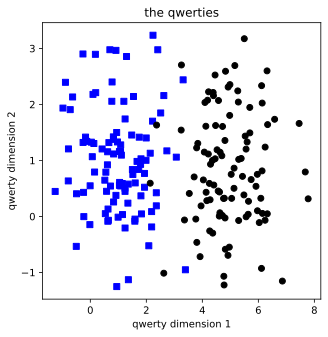

In [21]:
nPerClust=100
blur=1

A=[1,1]
B=[5,1]

a=[A[0]+np.random.randn(nPerClust)*blur,A[1]+np.random.randn(nPerClust)*blur ]
b=[B[0]+np.random.randn(nPerClust)*blur,B[1]+np.random.randn(nPerClust)*blur ]


labels_np=np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))
data_np=np.hstack((a,b)).T
data=torch.tensor(data_np).float()
labels=torch.tensor(labels_np).float()
fig=plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],'ko')


plt.title("the qwerties")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

In [22]:
class theClass4ANN(nn.Module):
    def __init__(self):
        super().__init__()
         
        self.input=nn.Linear(2,1)
        self.output=nn.Linear(1,1)
    def forward(self,x):
        x=self.input(x)
        x=F.relu(x)
        x=self.output(x)
        x=torch.sigmoid(x)
        
        return x
ANNclassify=theClass4ANN()

In [23]:
learningRate=0.01
lossfun=nn.BCELoss()
optimizer=torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)


In [24]:
numepoches=1000
losses=torch.zeros(numepoches)
for epochi in range(numepoches):
    yHat=ANNclassify(data)
    loss=lossfun(yHat,labels)
    losses[epochi]=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

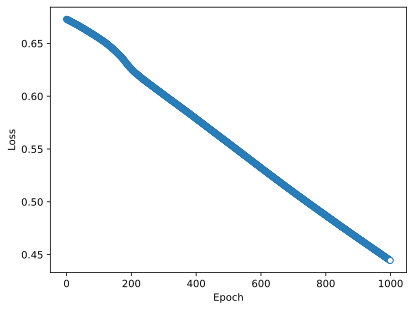

In [25]:
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=-.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [26]:
preds=ANNclassify(data)
predlabels=preds>0.5
idx_missclassified=np.where(predlabels!=labels)[0]
totalacc=100-100*len(idx_missclassified)/(2*nPerClust)
print(f"final accuracy {totalacc}")

final accuracy 90.0


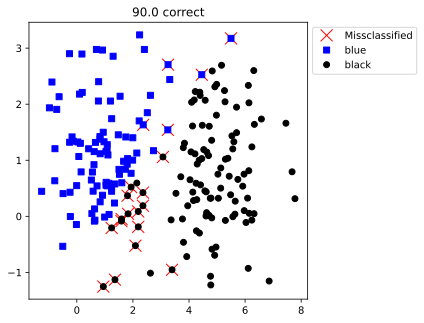

In [27]:
fig=plt.figure(figsize=(5,5))
plt.plot(data[idx_missclassified,0],data[idx_missclassified,1],'rx',markersize=12)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0],data[np.where(predlabels)[0],1],'ko')
plt.legend(['Missclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f"{totalacc} correct")
plt.show()

In [11]:
yHat

tensor([[0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6658],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6607],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6616],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6313],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6301],
        [0.6328],
        [0